In [1]:
# pip install mljar-supervised
#or
# conda install -c conda-forge mljar-supervised
# pip install requests

import requests
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML




pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
#get data
url = 'https://pennstateoffice365-my.sharepoint.com/:x:/g/personal/rjn5308_psu_edu/EZ-qWOeA5jxNkKXpwdWk_CoB-rCxrvsYcdhHaqzLfWruAQ?e=6inkuL&download=1'
r = requests.get(url)
r.status_code

with open('data.csv', 'w') as fid:
    fid.write(r.text)

#read data into pandas and view
data = pd.read_csv('data_og.csv')

In [4]:
# on plane
#read data into pandas and view
data = pd.read_csv('data_og.csv')

In [5]:
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # issue with json
data.fillna(method="ffill", inplace=True)
#data.dropna(inplace=True) # NEW

In [6]:
y = data['status']
#X = data.drop('status', axis=1, inplace=False)

X = data
dropList = ['wind_damage_rating', 'surge_damage_rating', 'rainwater_ingress_damage_rating', 'Unnamed0', 'longitude', 'status']
for each in dropList:
    X = X.drop(each, axis=1)

In [16]:
X.columns

Index(['Buildinglat', 'hazards_present', 'building_type', 'number_of_stories',
       'understory_pct_of_building_footprint', 'year_built', 'roof_shape',
       'mwfrs', 'foundation_type', 'wall_structure', 'wall_substrate',
       'wall_cladding', 'roof_system', 'roof_substrate_type', 'roof_cover',
       'Buildinglong', 'mindist'],
      dtype='object')

In [7]:
# X.describe()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

<AxesSubplot:>

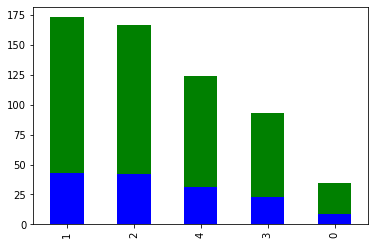

In [8]:
y_train.value_counts().plot(kind='bar',color='green')
y_test.value_counts().plot(kind='bar', color='blue')

In [9]:
automl = AutoML(
    results_path='2022_8_5_full-class',
    ml_task='multiclass_classification',
    #ml_task = 'regression',
   #algorithms=["CatBoost", "Xgboost", "LightGBM", "Random Forest", "Linear", "Decision Tree"],
    explain_level= 2,
    hill_climbing_steps=2,
    top_models_to_improve=2,
    golden_features=True, #on / off when needed
    features_selection=True,
    stack_models=True,
    train_ensemble=True,
    mix_encoding=True,
    validation_strategy={
        "validation_type": "kfold",
        "k_folds": 5,
        "shuffle": True,
        "stratify": True,
    }
)

automl.fit(X_train, y_train)


AutoML directory: 2022_8_5_full-class
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'mix_encoding', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble', 'stack', 'ensemble_stacked']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.501979 trained in 0.67 seconds


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

2_DecisionTree logloss 1.586101 trained in 37.26 seconds
3_Linear logloss 1.390655 trained in 26.43 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 1.184888 trained in 39.95 seconds
5_Default_NeuralNetwork logloss 2.052843 trained in 10.07 seconds
6_Default_RandomForest logloss 1.199217 trained in 37.11 seconds
* Step mix_encoding will try to check up to 1 model
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Conti

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


6_Default_RandomForest_GoldenFeatures logloss 1.203303 trained in 52.61 seconds
* Step insert_random_feature will try to check up to 1 model
4_Default_Xgboost_categorical_mix_GoldenFeatures_RandomFeature logloss 1.163504 trained in 44.77 seconds
Drop features ['random_feature', 'Buildinglong', 'building_type', 'Buildinglat', 'wall_substrate_Not Applicable', 'wall_cladding', 'number_of_stories_ratio_Buildinglat', 'roof_system_"Steel, joists"', 'roof_substrate_type_Unknown', 'Buildinglat_diff_number_of_stories', 'roof_system_"Wood, trusses"', 'roof_cover_"Metal, standing seam"', 'roof_cover_Asphalt shingles (laminated)', 'roof_shape_Complex', 'roof_system_Unknown', 'year_built_ratio_understory_pct_of_building_footprint', 'foundation_type_Cast-in-place concrete piers', 'foundation_type_Wood Piers <= 8 ft', 'roof_system_"Wood, unknown"', 'understory_pct_of_building_footprint_multiply_number_of_stories', 'Buildinglat_ratio_number_of_stories', 'wall_structure', 'understory_pct_of_building_fo

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins can

19_RandomForest_Stacked logloss 1.140339 trained in 211.34 seconds
24_NeuralNetwork_Stacked logloss 1.533504 trained in 145.81 seconds
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
4_Default_Xgboost_categorical_mix_GoldenFeatures_Stacked logloss 1.217057 trained in 199.45 seconds


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The left and right margins can

9_RandomForest_Stacked logloss 1.141128 trained in 228.49 seconds
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked logloss 1.111778 trained in 2.19 seconds
AutoML fit time: 3715.77 seconds
AutoML best model: Ensemble_Stacked


AutoML(explain_level=2, features_selection=True, golden_features=True,
       hill_climbing_steps=2, mix_encoding=True,
       ml_task='multiclass_classification', results_path='2022_8_5_full-class',
       stack_models=True, top_models_to_improve=2,
       validation_strategy={'k_folds': 5, 'shuffle': True, 'stratify': True,
                            'validation_type': 'kfold'})

In [8]:
predictions = automl.predict(X_test)


In [9]:

predict_all = automl.predict_all(X_test)

In [10]:

score = automl.score(X_test, y_test)
score


0.48755980394611287

In [11]:
predict_all

,prediction
0,2.142661
1,2.540641
2,1.945785
3,1.618312
4,1.401410
...,...
143,1.589508
144,0.925429
145,2.968555
146,1.506323
